<a href="https://colab.research.google.com/github/tharina11/Deep-Learning-Exercises/blob/main/6.%20Sentinel_2_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Source: [Kaggle](https://www.kaggle.com/datasets/apollo2506/eurosat-dataset). Code is mostly based on a tutorial in [Sentdex](https://www.youtube.com/watch?v=j-3vuBynnOE&list=PLQVvvaa0QuDfhTox0AjmQ6tvTgMBZBEXN&index=2&ab_channel=sentdex) youtube channel. 

In [2]:
# Import libraries to import and preprocess data
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [3]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# Data storage location
data_path_test = '/content/drive/MyDrive/Deep Learning/EuroSAT_RGB_subset/train'

In [5]:
# Lables for classification, names of berry types
categories = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 
              'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']

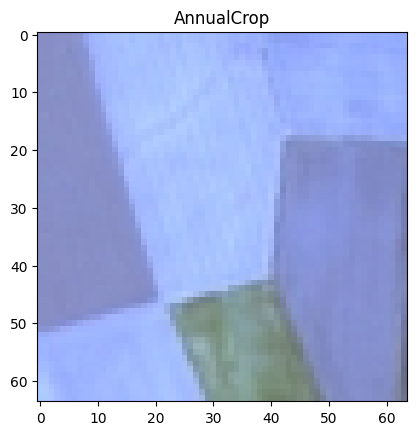

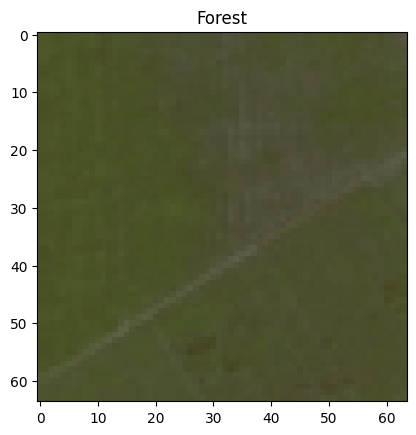

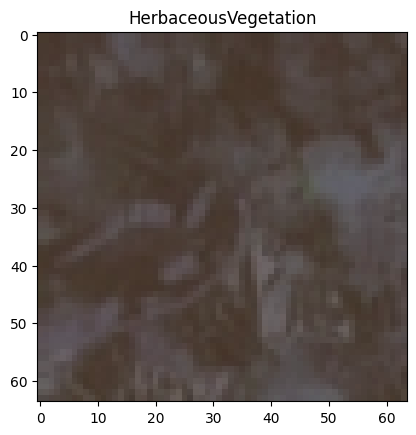

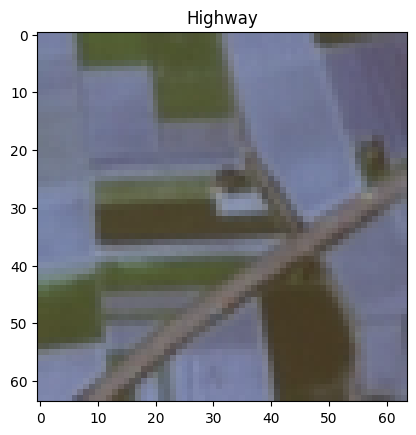

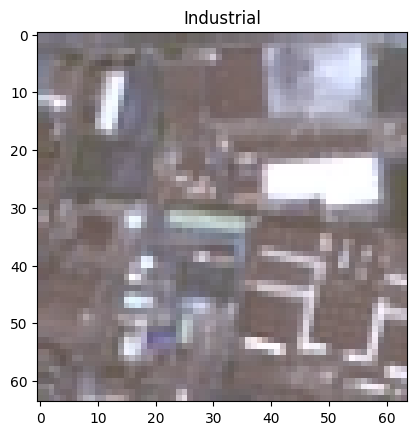

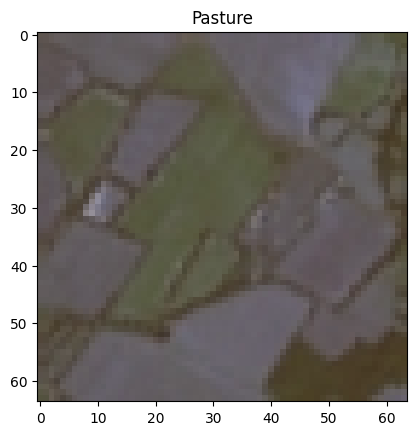

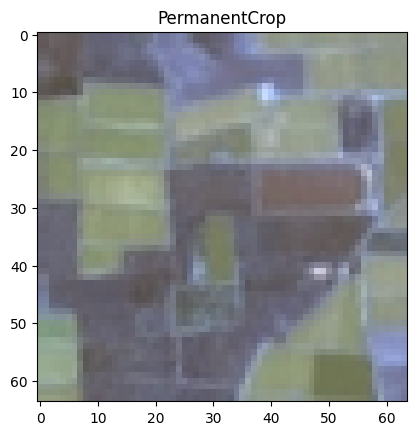

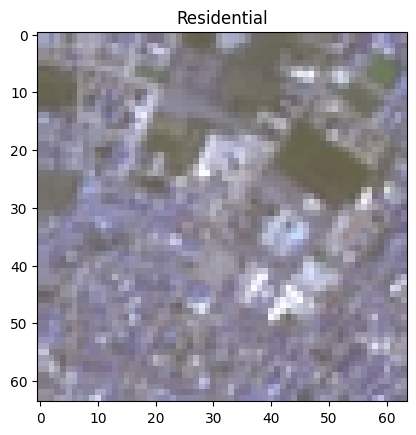

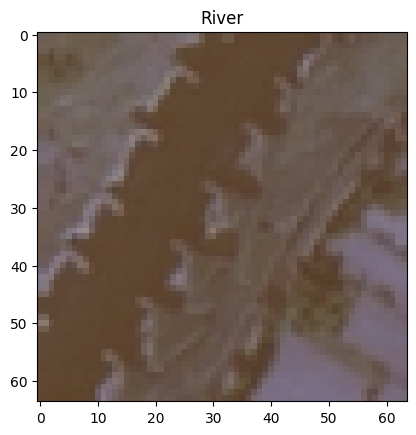

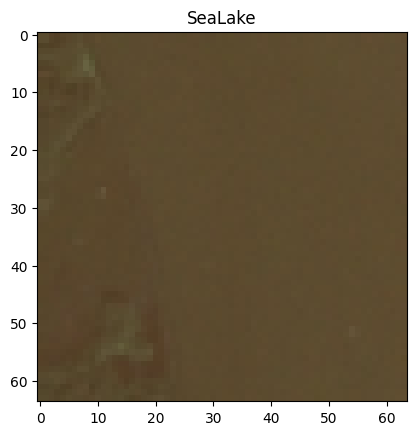

In [7]:
# Import data into training and testing images with labels
# Import data into an image array

for category in categories:
    path  = os.path.join(data_path_test, category)
    for image in os.listdir(path):
        image_array = cv2.imread(os.path.join(path, image))
        plt.imshow(image_array)
        plt.title(category)
        plt.show()
        break

In [ ]:
# preprocess training data to feed to the neural network
image_size = 100
training_data = []
# iterate over each directory of training data, convert each image to an array and resize images, add class number to each array
def create_training_data():
    for category in categories: 
        path = os.path.join(data_path_test ,category)
        class_number = categories.index(category) 
        for image in tqdm(os.listdir(path)):
            image_array = cv2.imread(os.path.join(path,image))
            new_array = cv2.resize(image_array, (image_size, image_size))
            training_data.append([new_array, class_number]) 

create_training_data()

In [ ]:
# Length of training data
print(len(training_data))

In [ ]:
# Shuffle input data to provide a generalized input
import random
random.shuffle(training_data)

In [ ]:
# Convert input data into numpy arrays
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, image_size, image_size, 3))

X = np.array(X).reshape(-1, image_size, image_size, 3) # Images are 3 band
y = np.asarray(y)

In [ ]:
# Read testing data
data_path_test = '/content/drive/MyDrive/Deep Learning/EuroSAT_RGB_subset/test' #edit

# iterate over each directory of testing data, view an image from each category
for category in categories: 
    path = os.path.join(data_path_test,category)  
    for image in os.listdir(path): 
        image_array_test = cv2.imread(os.path.join(path,image))
        plt.imshow(image_array_test)
        plt.title(category) 
        plt.show() 
        break

In [ ]:
# Preprocess testing data
image_size = 100
testing_data = []

# iterate over each directory of testing data, convert each image to an array and resize images, add class number to each array
def create_testing_data():
    for category in categories:
        path = os.path.join(data_path_test,category) 
        class_number = categories.index(category) 
        for image in tqdm(os.listdir(path)):  
                image_array_test = cv2.imread(os.path.join(path,image))  
                new_array_test = cv2.resize(image_array_test, (image_size, image_size))  
                testing_data.append([new_array_test, class_number])  

create_testing_data()

In [ ]:
# Convert testing data into numpy arrays
X_test = []
y_test = []

for features,label in testing_data:
    X_test.append(features)
    y_test.append(label)

print(X_test[0].reshape(-1, image_size, image_size, 3))
y_test = np.asarray(y_test)
X_test = np.array(X_test).reshape(-1, image_size, image_size, 3) # The images are 3 band

In [ ]:
# Scale feature data to o to 1 scale
X_test = X_test/255.0

In [ ]:
# Import libraries to build neural network
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

####**Reference**:
- [Kaggle EuroSAT dataset](https://www.kaggle.com/datasets/apollo2506/eurosat-dataset)
- [Sentdex - Deep Learning Playlist](https://www.youtube.com/watch?v=j-3vuBynnOE&list=PLQVvvaa0QuDfhTox0AjmQ6tvTgMBZBEXN&index=2&ab_channel=sentdex)
- [Transfer Learning with MobileNetV2 - kaggle](https://www.kaggle.com/code/dineshgulati/transfer-learning-with-mobilenetv2)